In [1]:
import numpy as np
import scipy.stats
import scipy.misc
import matplotlib.pyplot as plt
import logging
import math

import torch
import torch.distributions
from torch import Tensor
from torch.distributions import Uniform, Normal
from snle.distributions.TruncatedNormal import TruncatedNormal
from snle.distributions.LogNormalTranslated import LogNormalTranslated

In [2]:
def plot_sci_and_torch(sci_dist, torch_dist=None, lo=0, hi=1):
    x = np.arange(lo, hi, (hi - lo) / 500)
    x_torch = torch.arange(lo, hi, (hi - lo) / 500)
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    axes.flat[0].plot(x, sci_dist.pdf(x), lw=5, label="scipy")
    axes.flat[0].set_title("pdf")
    axes.flat[1].plot(x, sci_dist.logpdf(x), lw=5, label="scipy")
    axes.flat[1].set_title("logpdf")
    axes.flat[2].scatter(x, sci_dist.rvs(size=len(x)), marker=".", s=4, label="scipy")
    axes.flat[2].set_title("samples (scipy)")
    xprime = np.array([scipy.misc.derivative(sci_dist.pdf, i) for i in x ])
    axes.flat[4].plot(x[1:], xprime[1:], lw=5, label="scipy")
    axes.flat[4].set_title("derivative")
    print('SCIPY: mean={0:.2G}, var={1:.2G}'.format(sci_dist.mean(), sci_dist.var()))
    
    if torch_dist != None:
        axes.flat[0].plot(x_torch, torch.exp(torch_dist.log_prob(x_torch)), label="torch")
        axes.flat[1].plot(x_torch, torch_dist.log_prob(x_torch), label="torch")
        axes.flat[3].scatter(x_torch, torch_dist.sample([len(x)]), marker=".", s=4, label="torch")
        axes.flat[3].set_title("samples (torch)")
        
        x_diff = torch.arange(lo, hi, float((hi - lo) / 1000), requires_grad=True)
        x_diffprime = sum(torch.exp(torch_dist.log_prob(x_diff)))
        try:
            x_diffprime.backward()
            axes.flat[4].plot(x_diff.detach(), x_diff.grad, label="torch")
        except:
            logging.warning("Failed to calculate derivative of torch distribution")

        print('TORCH: mean={0:.2G}, var={1:.2G}'.format(torch_dist.mean, torch_dist.variance))
        
    axes.flat[0].legend()
    axes.flat[1].legend()
    axes.flat[4].legend()
    
    plt.show()

SCIPY: mean=25, var=7.4E+02
TORCH: mean=25, var=7.4E+02


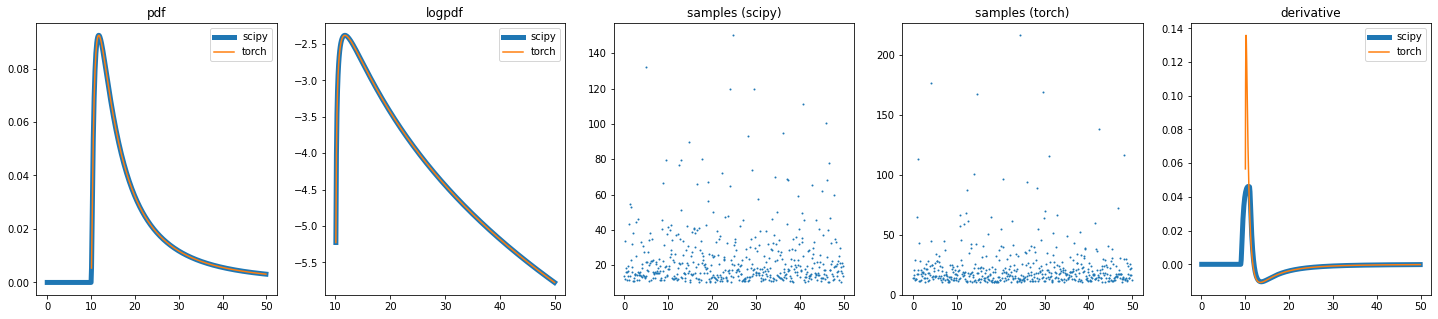

In [3]:
plot_sci_and_torch(
    scipy.stats.lognorm(s=1.2, loc=10, scale=np.exp(2)),
    LogNormalTranslated(s=1.2, loc=10, scale=np.exp(2), validate_args=False),
    0, 50
)

SCIPY: mean=7.5E+03, var=2.2E+08
TORCH: mean=7.5E+03, var=2.2E+08


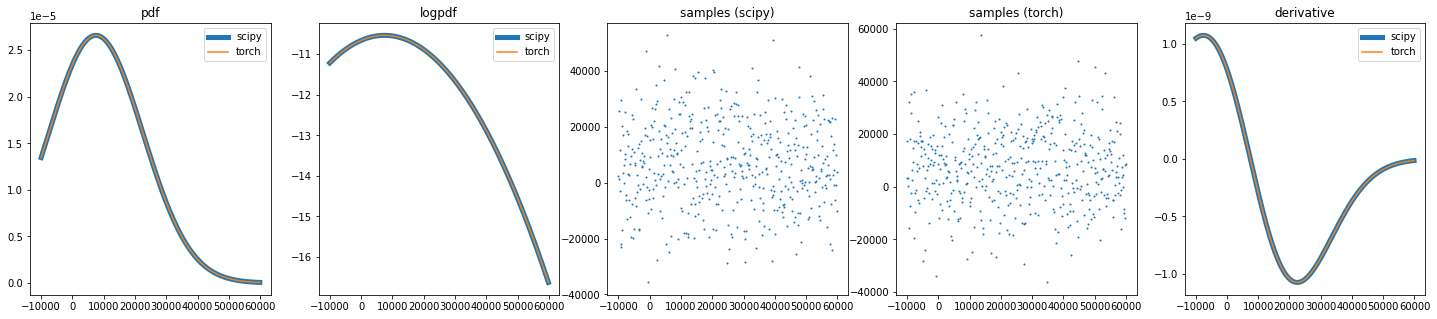

In [4]:
plot_sci_and_torch(
    scipy.stats.norm(loc=7500, scale=15000),
    Normal(loc=7500, scale=15000, validate_args=False),
    lo=-10000,
    hi=60000
)

SCIPY: mean=1.5E+04, var=1.1E+08
TORCH: mean=1.5E+04, var=1.1E+08


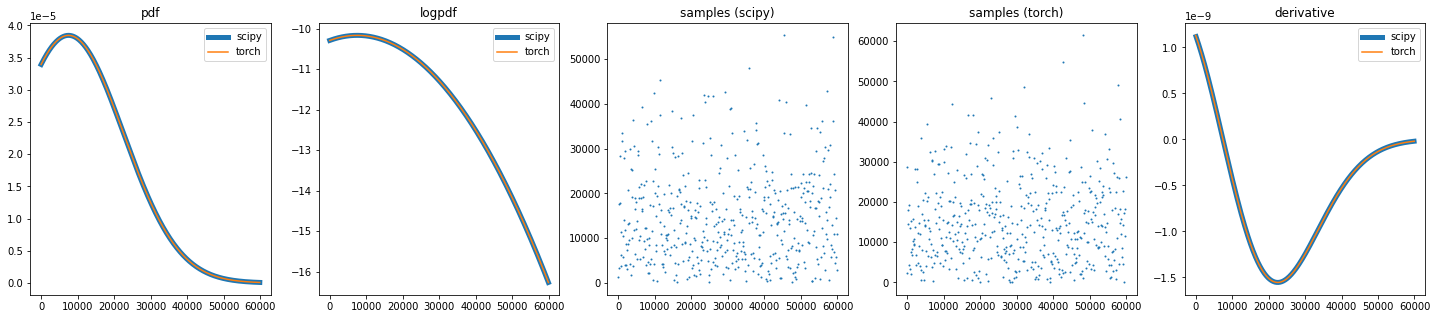

In [5]:
plot_sci_and_torch(
    scipy.stats.truncnorm(a=-0.5, b=np.inf, loc=7500, scale=15000),
    TruncatedNormal(a=-0.5, b=np.inf, loc=7500, scale=15000),
    # mean, std
    lo=0,
    hi=60000
)

SCIPY: mean=5E+03, var=8.3E+06
TORCH: mean=5E+03, var=8.3E+06


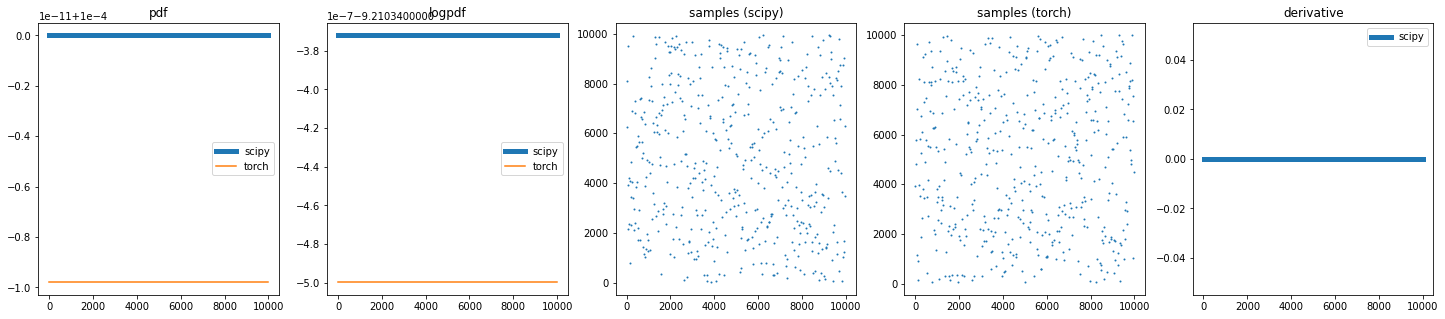

In [6]:
plot_sci_and_torch(
    scipy.stats.uniform(loc=0, scale=10000),
    Uniform(low=0, high=10000),
    lo=0,
    hi=10000
)